In [67]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [68]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [69]:
NUM_CLASSES = 65

# Dataset reading

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 40)                440       
                                                                 
Total params: 1510 (5.90 KB)
Trainable params: 1510 (5.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 [=>............................] - ETA: 22s - loss: 3.7275 - accuracy: 0.0234
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
15/15 [==============================] - 2s 41ms/step - loss: 3.7076 - accuracy: 0.0228 - val_loss: 3.6575 - val_accuracy: 0.0283
Epoch 2/1000
15/15 [==============================] - ETA: 0s - loss: 3.6326 - accuracy: 0.0611

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
15/15 [==============================] - 0s 14ms/step - loss: 3.6326 - accuracy: 0.0611 - val_loss: 3.5956 - val_accuracy: 0.0998
Epoch 3/1000
14/15 [===========================>..] - ETA: 0s - loss: 3.5530 - accuracy: 0.0854
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
15/15 [==============================] - 0s 10ms/step - loss: 3.5526 - accuracy: 0.0855 - val_loss: 3.5301 - val_accuracy: 0.1498
Epoch 4/1000
 1/15 [=>............................] - ETA: 0s - loss: 3.5391 - accuracy: 0.0391
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
15/15 [==============================] - 0s 7ms/step - loss: 3.4675 - accuracy: 0.1044 - val_loss: 3.4381 - val_accuracy: 0.1780
Epoch 5/1000
 1/15 [=>............................] - ETA: 0s - loss: 3.4105 - accuracy: 0.1172
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
15/15 [===========

In [78]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.8403


In [79]:
# Load the saved model
model = tf.keras.models.load_model(model_save_path)

In [80]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 72ms/step
[5.5833064e-02 1.2862889e-02 4.9435079e-01 1.3117875e-03 4.6276112e-04
 1.6391173e-01 3.9456000e-10 1.7082391e-04 1.1391169e-02 9.5329555e-03
 9.5386431e-02 1.8645566e-03 1.1118157e-03 3.4800217e-02 2.0459905e-02
 7.2670522e-11 9.9976687e-03 9.4786234e-10 6.3693939e-09 3.7521093e-09
 6.9986872e-02 1.6564578e-02 6.4536726e-10 4.5860928e-09 2.0849830e-10
 1.4737939e-08 2.0043183e-09 2.4066860e-10 8.3942284e-11 1.3067353e-08
 3.8857504e-09 3.4486101e-09 3.5399225e-11 5.2076430e-11 7.9029867e-09
 4.0120554e-10 3.5258829e-09 4.1729994e-10 1.3555164e-10 2.2531403e-10]
2


# Confusion matrix

19/19 [==============================] - 0s 1ms/step


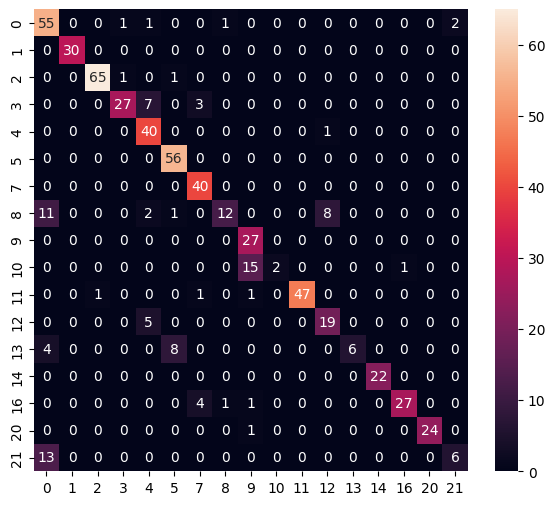

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.92      0.77        60
           1       1.00      1.00      1.00        30
           2       0.98      0.97      0.98        67
           3       0.93      0.73      0.82        37
           4       0.73      0.98      0.83        41
           5       0.85      1.00      0.92        56
           7       0.83      1.00      0.91        40
           8       0.86      0.35      0.50        34
           9       0.60      1.00      0.75        27
          10       1.00      0.11      0.20        18
          11       1.00      0.94      0.97        50
          12       0.68      0.79      0.73        24
          13       1.00      0.33      0.50        18
          14       1.00      1.00      1.00        22
          16       0.96      0.82      0.89        33
          20       1.00      0.96      0.98        25
          21       0.75      0.32      0.44        19

    

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [82]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmpv7t_1tez/assets


INFO:tensorflow:Assets written to: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmpv7t_1tez/assets
2024-02-20 22:30:24.426624: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-20 22:30:24.427191: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-02-20 22:30:24.429952: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmpv7t_1tez
2024-02-20 22:30:24.432613: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-02-20 22:30:24.432630: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmpv7t_1tez
2024-02-20 22:30:24.442103: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-02-20 22:30:24.516984: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

8180

# Inference test

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [85]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 525 µs, sys: 1.27 ms, total: 1.79 ms
Wall time: 1.49 ms


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.5833042e-02 1.2862885e-02 4.9435073e-01 1.3117886e-03 4.6276150e-04
 1.6391169e-01 3.9456066e-10 1.7082402e-04 1.1391171e-02 9.5329583e-03
 9.5386475e-02 1.8645563e-03 1.1118175e-03 3.4800220e-02 2.0459905e-02
 7.2670793e-11 9.9976677e-03 9.4786401e-10 6.3694170e-09 3.7521088e-09
 6.9986843e-02 1.6564589e-02 6.4536709e-10 4.5860920e-09 2.0849868e-10
 1.4737935e-08 2.0043178e-09 2.4066854e-10 8.3942436e-11 1.3067326e-08
 3.8857495e-09 3.4486163e-09 3.5399354e-11 5.2076423e-11 7.9030000e-09
 4.0120546e-10 3.5258825e-09 4.1730069e-10 1.3555188e-10 2.2531400e-10]
2
